In [1]:
from synthetic_circuits import create_parallel_circuit

In [2]:
# Set num_layers and num_qubits
num_layers = 3
num_qubits = 12

# Set coupling_map
from qiskit.transpiler import CouplingMap
cm = CouplingMap.from_ring(num_qubits)

# set seed
seed = 42

# Default Construction (no density list given)

Density list: [0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113]


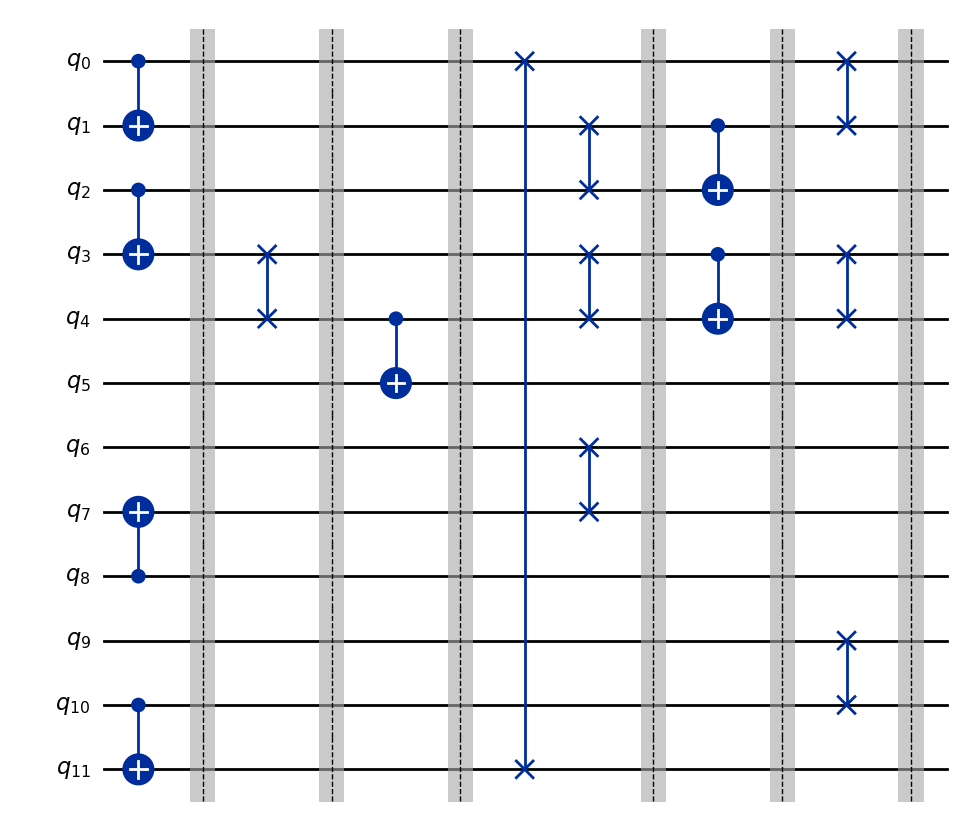

In [3]:
qc = create_parallel_circuit(cm, num_layers, barrier=True, seed=seed)
qc.draw(output='mpl')


# Changing Densities

## Construction (Setting min densities)

Density list: [0.8197133992289418, 0.5125053776113335, 0.6375146591845596, 0.6116053690744114, 0.8682356070820062, 0.8383497437114557]


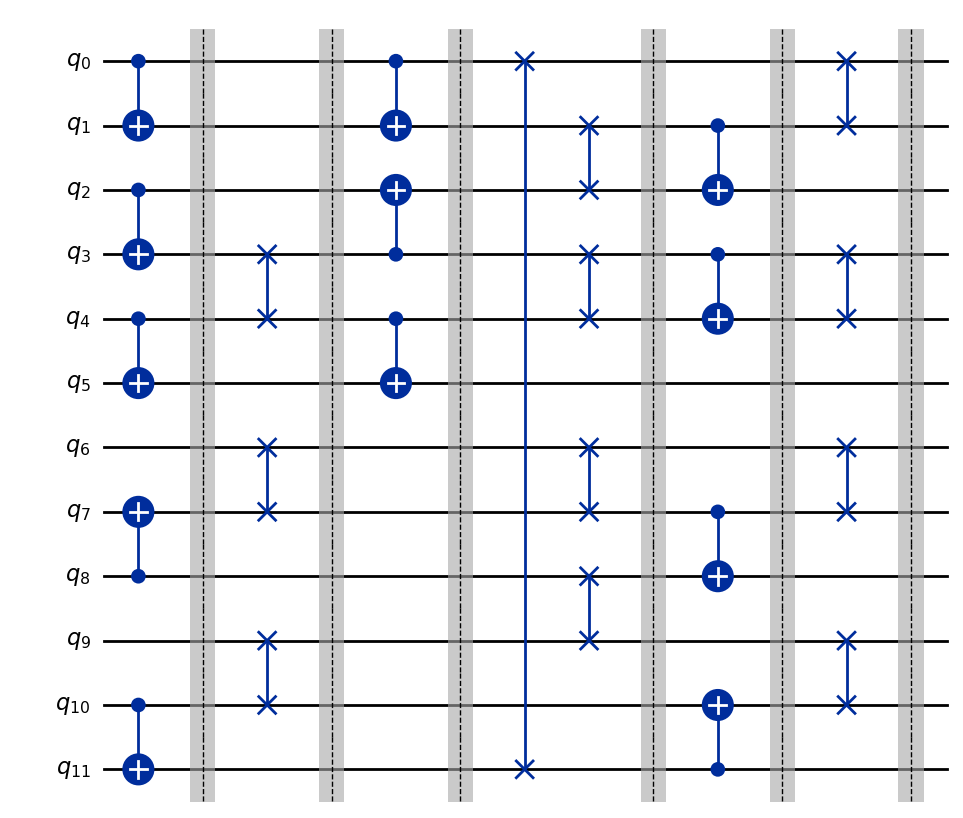

In [4]:
cx_min_density   = 0.5
swap_min_density = 0.5
qc = create_parallel_circuit(cm, num_layers, barrier=True, seed=seed,
                             cx_min_density=cx_min_density,
                             swap_min_density=swap_min_density)
qc.draw(output='mpl')


## Construction (Setting max density)
Here set swap density to be about 1 swap per layer

Density list: [0.8197133992289418, 0.5125053776113335, 0.6375146591845596, 2.232107381488228e-06, 7.364712141640125e-06, 6.7669948742291135e-06]


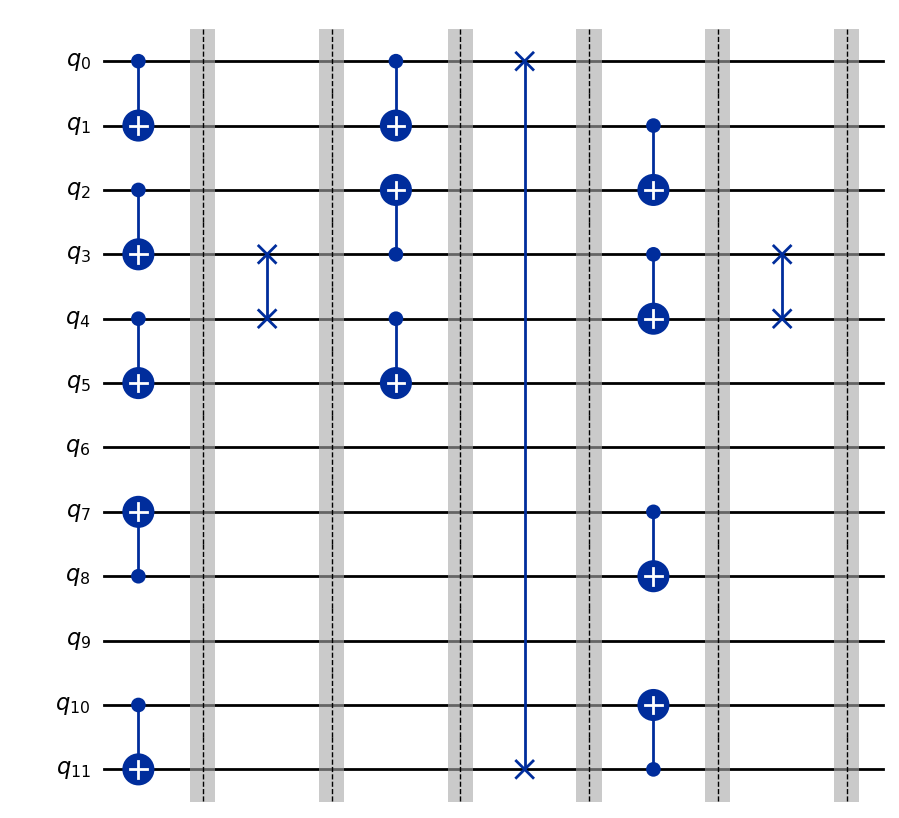

In [5]:
cx_min_density   = 0.5  # just to have a good number of CNOTs
swap_max_density = 0.00001

qc = create_parallel_circuit(cm, num_layers, barrier=True, seed=seed, cx_min_density=cx_min_density, swap_max_density=swap_max_density)
qc.draw(output='mpl')


## Construction (Setting some of the layers to be empty)
Here we set a percentage of the swap layers to be 0 

Density list: [0.8197133992289418, 0.5125053776113335, 0.6375146591845596, 0, 0.8682356070820062, 0]


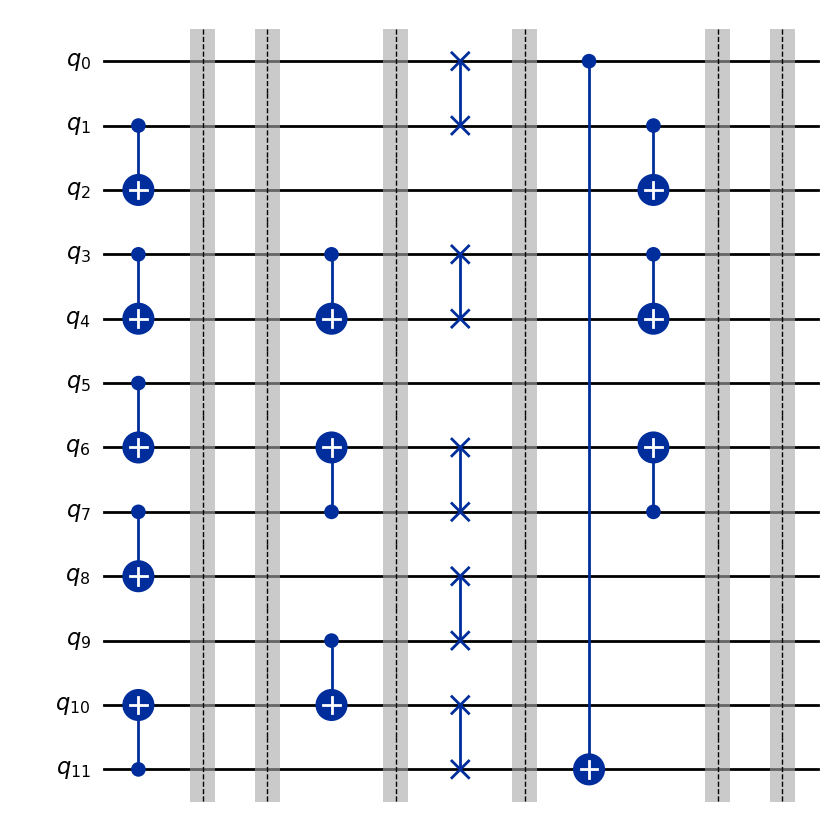

In [6]:
cx_min_density   = 0.5 # just to have a good number of CNOTs
swap_min_density = 0.5 # just to have a good number of SWAPs
swap_zero_percentage = 2/3 

qc = create_parallel_circuit(cm, num_layers, barrier=True, seed=seed,
                             cx_min_density=cx_min_density,
                             swap_min_density=swap_min_density,
                             swap_zero_percentage=swap_zero_percentage)
qc.draw(output='mpl')


# Custom density construction
Note 
- first half represents the densities of the cx
- second half represents the densities of the swaps

Density list: [0.8, 0.6, 0.4, 1, 0, 0.2]


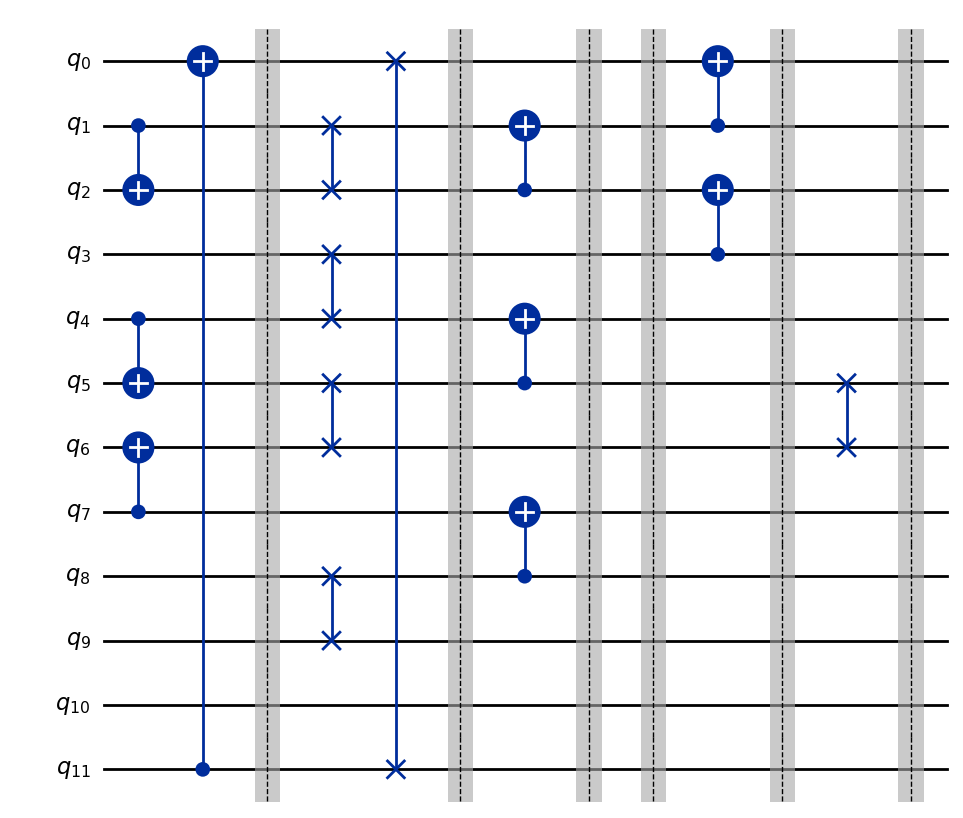

In [9]:
cx_densities   = [.8, .6, .4]
swap_densities = [1, 0, .2]

density_list = cx_densities + swap_densities

qc = create_parallel_circuit(cm, num_layers, density_list, barrier=True, seed=seed)
qc.draw(output='mpl')